In [1]:
run_name = 'run3'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yaml, sys
from datetime import datetime 

In [3]:
sys.path.append('.')
from getDataFromMysql import getData
from temp_utils import adc2T
from resistors_utils import V2power, power2V

In [4]:
samples = yaml.load(open('samples/runs.yml'), Loader=yaml.FullLoader)
sensor_maps = yaml.load(open('samples/sensor_map.yml'), Loader=yaml.FullLoader)

In [5]:
dset = samples[run_name]
sensor_map = sensor_maps[dset['sensor_map']]

In [6]:
def getRelativeTime(data, units='s'):
    dt_s = map(lambda x: (x-data[0][0]).total_seconds(), data[:,0])
    conv = {'s':1, 'm':60., 'h':3600}
    
    return np.array(dt_s)/conv[units]

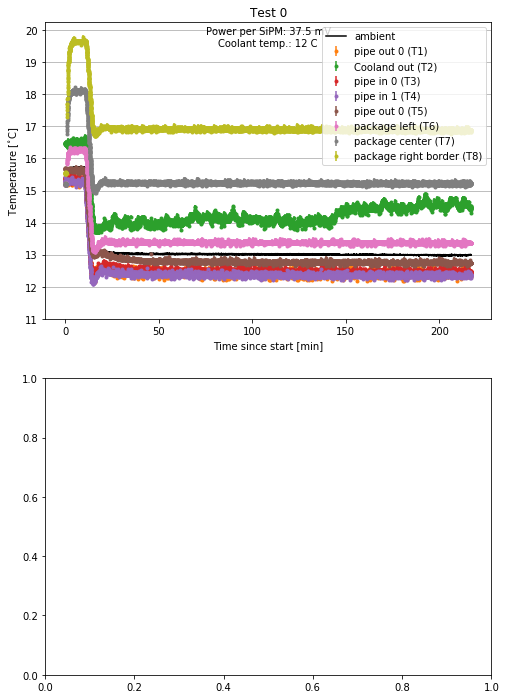

In [10]:
N_rows = max(2,len(dset['times']))
fig, ax = plt.subplots(N_rows, 1, figsize=(8,6*N_rows),
                       sharex=False, sharey=False
                      )

for i_t, times in enumerate(dset['times']):
    data = np.array(getData(times))
    
    t = getRelativeTime(data, 'm')
    
    for i in range(1, len(sensor_map)+1):
        T = adc2T(data[:,i])
        T_UP = adc2T(data[:,i]+1)
        err = np.hypot(T - T_UP, 0.05)
        
    
        label = '{} (T{})'.format(sensor_map[i-1], i)
        ax[i_t].errorbar(t, T, err, fmt='.', color='C'+str(i), label=label)
        if i==1 and np.sum(data[:,10]) > 0:
            ax[i_t].plot(t, data[:,10], color='k', label='ambient')
        
        ax[i_t].set_title('Test {}'.format(i_t))
        if i == len(sensor_map):
            p, _ = V2power(dset['voltage'])
            power_txt = 'Power per SiPM: {:.1f} mV\nCoolant temp.: {} C'.format(1e3*p, dset['temp'])
            ax[i_t].text(0.5, 0.95, power_txt, 
                         horizontalalignment='center',
                         verticalalignment='center', 
                         transform=ax[i_t].transAxes)
            ax[i_t].legend(loc='best')
            ax[i_t].set_xlabel('Time since start [min]')
            ax[i_t].set_ylabel(r'Temperature [$^{\circ}$C]')
            ax[i_t].grid(axis='y')
            low, up = ax[i_t].get_ylim()
            ax[i_t].set_yticks(np.arange(np.floor(low), np.ceil(up), 1.))

In [8]:
P, I = V2power(30)
print P, I

0.0375 0.02
